In [9]:
import numpy as np
import pandas as pd

from random import random

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# cycler
from cycler import cycler

%matplotlib inline
print(mpl.__version__)

3.3.2


## Colors

### 1. matplotlib color set

<img src="images/matplotlib_base_colors.png" style="display: block; margin: auto;" alt="matplotlib's base colors" />
<img src="images/matplotlib_tableau_palette.png" style="display: block; margin: auto;" alt="matplotlib's tableau palette (colors)" />
<img src="images/matplotlib_css_colors.png" style="display: block; margin: auto;" alt="matplotlib's colors (about css)" />

In [7]:
print(
  "mcolors.BASE_COLORS['r']: {},\t\ttype={}"
  .format(mcolors.BASE_COLORS['r'], type(mcolors.BASE_COLORS['r'])),
  "mcolors.TABLEAU_COLORS['tab:red']: {},\ttype={}"
  .format(mcolors.TABLEAU_COLORS['tab:red'], type(mcolors.TABLEAU_COLORS['tab:red'])),
  "mcolors.CSS4_COLORS['red']: {},\t\ttype: {}"
  .format(mcolors.CSS4_COLORS['red'], type(mcolors.CSS4_COLORS['red'])),
  sep="\n")

mcolors.BASE_COLORS['r']: (1, 0, 0),		type=<class 'tuple'>
mcolors.TABLEAU_COLORS['tab:red']: #d62728,	type=<class 'str'>
mcolors.CSS4_COLORS['red']: #FF0000,		type: <class 'str'>


세 색들의 저장 방식이 다르다 = 이용하기 어렵다로 해석될 수 있으나<br />
matplotlib가 잘 되어 있어 내부 기능을 통해 통일시켜 이용할 수 있다.

In [19]:
colorl = {}
colorl.update(mcolors.BASE_COLORS)
colorl.update(mcolors.TABLEAU_COLORS)
colorl.update(mcolors.CSS4_COLORS)

colorn, colorc = [], []
for name, color in colorl.items():
  colorn.append(name)
  colorc.append(color)

In [20]:
colorl

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1),
 'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf',
 'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9

### 2. Cycler

matplotlib에서 여러 색을 이용하나 그 색들의 index를 넘어가는 값에 대해선 순환하여 색을 대체한다.<br />색이 저장된 데이터 구조가 10개의 원형-큐의 형태이다.

In [22]:
plt.rcParams["axes.prop_cycle"]

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


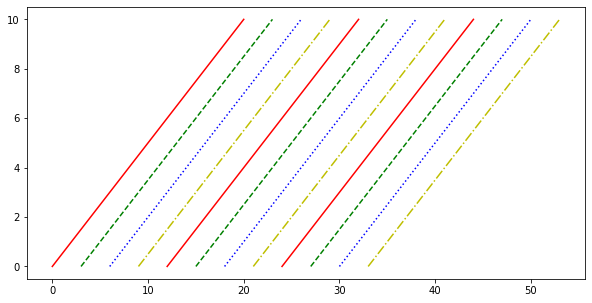

In [27]:
plt.rc("axes", prop_cycle=(cycler(color=["r", "g", "b", "y"]) +
                            cycler(linestyle=["-", "--", ":", "-."])))

data_x = np.array([0, 20])
data_y = [0, 10]

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(12):
  ax.plot(data_x + 3 * i, data_y)
plt.show()

In [28]:
th = np.linspace(0, 2 * np.pi, 128)

def demo(num):
  ax[num].plot(th, np.cos(th), f"C{num}", label=f"C{num}")
  ax[num].plot(th, np.sin(th), f"C{num + 2}", label=f"C{num + 2}")
  ax[num].legend()

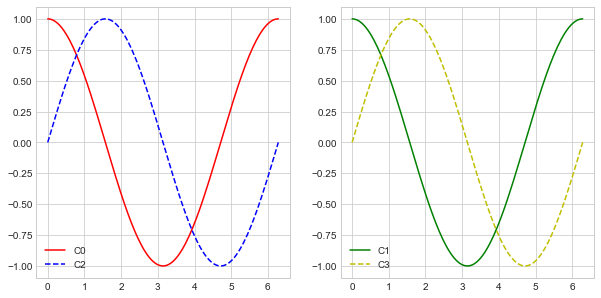

In [29]:
mpl.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

demo(0)
demo(1)

## Color Function

<pre>
matplotlib가 인식하는 color format

1. 저장된 color name    "darkred"
2. RGB 16진수           "AABBFF"
3. RGBA 표기            "AABBFF55"
4. RGB percent 표기     "[0.2, 0.4, 0.5]"
5. RGBA percent 표기    "[0.2, 0.4, 0.5, 0.6]"
</pre>

In [11]:
c1 = 'darkred'             # matplotlib color name
c2 = '#AABBFF'             # hex code without alpha 
c3 = '#AABBFF55'           # hex code with alpha
c4 = [0.2, 0.4, 0.5]       # RGB
c5 = [0.2, 0.4, 0.5, 0.6]  # RGBA: RGB + alpha

### 1. to_hex(), to_rgb(), to_rgba()

In [37]:
colors = pd.DataFrame(columns=["input", "to_hex(F)", "to_hex(T)", "to_rgb()",
                               "to_rgba(alpha=None)", "to_rgba(alpha=0.2)"])

for i in range(5):
  hex_code0 = mcolors.to_hex(eval(f"c{i + 1}"), keep_alpha=False)
  hex_code1 = mcolors.to_hex(eval(f"c{i + 1}"), keep_alpha=True)

  rgb_code0 = np.round(mcolors.to_rgb(eval(f"c{i + 1}")), 3)

  rgb_code1 = np.round(mcolors.to_rgba(eval(f"c{i + 1}")), 3)
  rgb_code2 = np.round(mcolors.to_rgba(eval(f"c{i + 1}"), 0.2), 3)

  colors.loc[i] = [eval(f"c{i + 1}"), hex_code0, hex_code1, rgb_code0, rgb_code1, rgb_code2]

In [38]:
colors

,input,to_hex(F),to_hex(T),to_rgb(),to_rgba(alpha=None),to_rgba(alpha=0.2)
0,darkred,#8b0000,#8b0000ff,"[0.545, 0.0, 0.0]","[0.545, 0.0, 0.0, 1.0]","[0.545, 0.0, 0.0, 0.2]"
1,#AABBFF,#aabbff,#aabbffff,"[0.667, 0.733, 1.0]","[0.667, 0.733, 1.0, 1.0]","[0.667, 0.733, 1.0, 0.2]"
2,#AABBFF55,#aabbff,#aabbff55,"[0.667, 0.733, 1.0]","[0.667, 0.733, 1.0, 0.333]","[0.667, 0.733, 1.0, 0.2]"
3,"[0.2, 0.4, 0.5]",#336680,#336680ff,"[0.2, 0.4, 0.5]","[0.2, 0.4, 0.5, 1.0]","[0.2, 0.4, 0.5, 0.2]"
4,"[0.2, 0.4, 0.5, 0.6]",#336680,#33668099,"[0.2, 0.4, 0.5]","[0.2, 0.4, 0.5, 0.6]","[0.2, 0.4, 0.5, 0.2]"


### 2. to_rgba_array(): 일괄 변경

- 일정 이하 소숫점 버리기
- 원소가 3개면 alpha = 1
- 3개 미만이면 raise error

In [3]:
colors = []
for i in range(5):
  colorc = [random(), random(), random(), random()]
  colors.append(colorc)

print("# colors=", colors, f"# type(colors)= {type(colors)}", sep="\n")

# colors=
[[0.5025941718451649, 0.37912341659508175, 0.7193117768941568, 0.9355509213014598], [0.16869187292866616, 0.005582359776039492, 0.17259219668356562, 0.7446326176772887], [0.3236810660757563, 0.015014037596857266, 0.13765870166930005, 0.5799621673499226], [0.7970108454208075, 0.8155583670826929, 0.5671371191482839, 0.4687799590341243], [0.1603109890307297, 0.22971907791203372, 0.6768957843333514, 0.1300554227680225]]
# type(colors)= <class 'list'>


In [4]:
rgb_code = mcolors.to_rgba_array(colors)
print("# rgb_code=", rgb_code, f"type(rgb_code)= {type(rgb_code)}", sep="\n")

# rgb_code=
[[0.50259417 0.37912342 0.71931178 0.93555092]
 [0.16869187 0.00558236 0.1725922  0.74463262]
 [0.32368107 0.01501404 0.1376587  0.57996217]
 [0.79701085 0.81555837 0.56713712 0.46877996]
 [0.16031099 0.22971908 0.67689578 0.13005542]]
type(rgb_code)= <class 'numpy.ndarray'>


Numpy's Masked Array

- invalid 등 특정 데이터에 mask를 씌워 가린 numpy array

In [7]:
mask = [[0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0]]
# 세번째 행 1 ~ 3열과 네번째 행 4열을 가리는 mask
mx = np.ma.masked_array(colors, mask)

print("# mx=", mx, f"type(mx)= {type(mx)}", sep="\n")

# mx=
[[0.5025941718451649 0.37912341659508175 0.7193117768941568
  0.9355509213014598]
 [0.16869187292866616 0.005582359776039492 0.17259219668356562
  0.7446326176772887]
 [-- -- -- 0.5799621673499226]
 [0.7970108454208075 0.8155583670826929 0.5671371191482839 --]
 [0.1603109890307297 0.22971907791203372 0.6768957843333514
  0.1300554227680225]]
type(mx)= <class 'numpy.ma.core.MaskedArray'>


### 3. rgb_to_hsv() and hsv_to_rgb()

간만에 보는 rgb, hsv 색상표

<img src="images/rgb_and_hsv.png" style="display: block; margin: auto;" alt="RGB, HSV 3d color space" />

- RGB: Red, Greed, Blue 순으로 색의 값을 표현하는 color 표기
- BGR: 대부분의 영상처리에 관련한 programming 언어에서 채택하는 color 표기
- HSV: Hue, Sturation, Value순. 색채 다양성, 채도, 명도 정도로 생각할 수 있음.
- YCrCb: Luma, Blue-difference, Red-difference. 여기서부턴 사람이 지정하는 것보다 computer로 색 찾는 게 더 빠름. (앞에 표기도 그렇지만, 여기서부터는 장난 없는 걸로 기억함.)
- CIE (이름만 들어봤음)

In [15]:
hsv_c4 = mcolors.rgb_to_hsv(c4)
rgb_c4 = mcolors.hsv_to_rgb(hsv_c4)

In [17]:
print(f"c4:\t{c4}", f"to hsv:\t{hsv_c4}", f"to rgb:\t{rgb_c4}", sep="\n")

c4:	[0.2, 0.4, 0.5]
to hsv:	[0.55555556 0.6        0.5       ]
to rgb:	[0.2 0.4 0.5]
